In [1]:
%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import packages
import xarray as xr
import xesmf as xe
import intake
import util 
import pprint 

In [10]:
col = intake.open_esm_datastore("../catalogs/pangeo-cmip6.json")
cat = col.search(experiment_id=['ssp126', 'ssp585'], source_id=['CESM2'], variable_id=['ts'])
ds = cat.to_dataset_dict(cdf_kwargs={'chunks': {'time': 10}})
ssp_126 = ds['ScenarioMIP.NCAR.CESM2.ssp126.Amon.gn']['ts']
ssp_585 = ds['ScenarioMIP.NCAR.CESM2.ssp585.Amon.gn']['ts']

--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'

--> There will be 2 group(s)


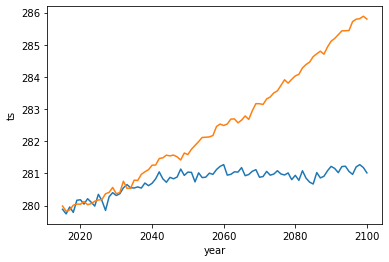

In [31]:
ssp_126.mean(dim='lat').mean(dim='lon').squeeze().groupby('time.year').mean('time').plot()
ssp_585.mean(dim='lat').mean(dim='lon').mean(dim='member_id').squeeze().groupby('time.year').mean('time').plot()

